In [110]:
#Making MDP

states = [_ for _ in range(101)]
gambler_mdp = {_:{} for _ in states}
ph = 0.4
pt = 1-ph
gamma = 1

In [111]:
#Filling MDP

for state in states:
    if state == 0 or state == 100:
        continue
    actions = [_ for _ in range(min(state, 100-state)+1)]
    transitions={}
    for action in actions:
        transitions[action]=[]
        transitions[action].append((ph, state+action, int((state+action)==100)))
        transitions[action].append((pt, state-action, int((state-action)==100)))
    gambler_mdp[state]=transitions
print(gambler_mdp)

{0: {}, 1: {0: [(0.4, 1, 0), (0.6, 1, 0)], 1: [(0.4, 2, 0), (0.6, 0, 0)]}, 2: {0: [(0.4, 2, 0), (0.6, 2, 0)], 1: [(0.4, 3, 0), (0.6, 1, 0)], 2: [(0.4, 4, 0), (0.6, 0, 0)]}, 3: {0: [(0.4, 3, 0), (0.6, 3, 0)], 1: [(0.4, 4, 0), (0.6, 2, 0)], 2: [(0.4, 5, 0), (0.6, 1, 0)], 3: [(0.4, 6, 0), (0.6, 0, 0)]}, 4: {0: [(0.4, 4, 0), (0.6, 4, 0)], 1: [(0.4, 5, 0), (0.6, 3, 0)], 2: [(0.4, 6, 0), (0.6, 2, 0)], 3: [(0.4, 7, 0), (0.6, 1, 0)], 4: [(0.4, 8, 0), (0.6, 0, 0)]}, 5: {0: [(0.4, 5, 0), (0.6, 5, 0)], 1: [(0.4, 6, 0), (0.6, 4, 0)], 2: [(0.4, 7, 0), (0.6, 3, 0)], 3: [(0.4, 8, 0), (0.6, 2, 0)], 4: [(0.4, 9, 0), (0.6, 1, 0)], 5: [(0.4, 10, 0), (0.6, 0, 0)]}, 6: {0: [(0.4, 6, 0), (0.6, 6, 0)], 1: [(0.4, 7, 0), (0.6, 5, 0)], 2: [(0.4, 8, 0), (0.6, 4, 0)], 3: [(0.4, 9, 0), (0.6, 3, 0)], 4: [(0.4, 10, 0), (0.6, 2, 0)], 5: [(0.4, 11, 0), (0.6, 1, 0)], 6: [(0.4, 12, 0), (0.6, 0, 0)]}, 7: {0: [(0.4, 7, 0), (0.6, 7, 0)], 1: [(0.4, 8, 0), (0.6, 6, 0)], 2: [(0.4, 9, 0), (0.6, 5, 0)], 3: [(0.4, 10, 0), (0.6, 

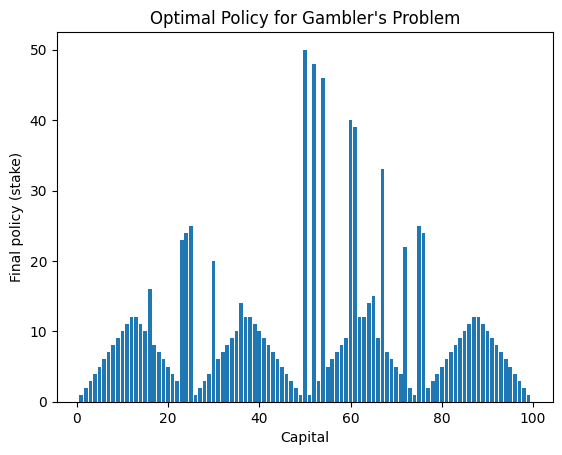

In [112]:
#ValueIteration

v = [1.0]*101
newv = [0.0]*101
v[100]=1
newv[100]=1
oldpolicy = [0]*100
newpolicy = [1]*100
smol = 1e-3

it = 0
itstates = [_ for _ in range(1, 100)]
while True:
    it+=1
    oldpolicy = newpolicy.copy()
    v = newv.copy()
    delt = 0
    #BellmanOptimality Update
    for state in itstates:
        curr = 0
        actions = [_ for _ in range(1, min(state, 100-state)+1)]
        x = 0
        for action in actions:
            a1 = gambler_mdp[state][action][0]
            a2 = gambler_mdp[state][action][1]
            s = (a1[0]*(a1[2]+gamma*v[a1[1]])) + (a2[0]*(a2[2]+gamma*v[a2[1]]))
            if(s>curr):
                curr = s
                x = action
        newv[state] = curr
    delt = (max(abs(newv[s] - v[s]) for s in itstates))
    
    
    if(delt<smol):
        for state in itstates:
            curr = 0
            actions = [_ for _ in range(1, min(state, 100-state)+1)]
            x = 0
            for action in actions:
                a1 = gambler_mdp[state][action][0]
                a2 = gambler_mdp[state][action][1]
                s = (a1[0]*(a1[2]+gamma*newv[a1[1]])) + (a2[0]*(a2[2]+gamma*newv[a2[1]]))
                if(s>curr):
                    curr = s
                    x = action
            newpolicy[state] = x
        break
policy = newpolicy.copy()
import matplotlib.pyplot as plt
v = newv.copy()
states = range(1, 100)
stakes = [policy[s] for s in states]

plt.figure()
plt.bar(states, stakes)
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.title("Optimal Policy for Gambler's Problem")
plt.show()